In [1]:
import sys, os, cv2
import numpy as np
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.kitti_dataset_utils.kitti_remap_utils import load_all_sequence_groundtruths_json
from modules.augmentation.lib.photometric_transform import augment_hsv, hist_equalize
from modules.plot.viz_annotation import draw_bbox_on_img_data

In [2]:
selected_labels, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_all_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

random_idx = np.arange(len(selected_labels))
np.random.shuffle(random_idx)
selected_labels = [selected_labels[idx] for idx in random_idx]

Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0007
Sequence: 0008
Sequence: 0009
Sequence: 0010
Sequence: 0011
Sequence: 0012
Sequence: 0013
Sequence: 0014
Sequence: 0015
Sequence: 0016
Sequence: 0017
Sequence: 0018
Sequence: 0019
Sequence: 0020


## Random HSV Augmentation

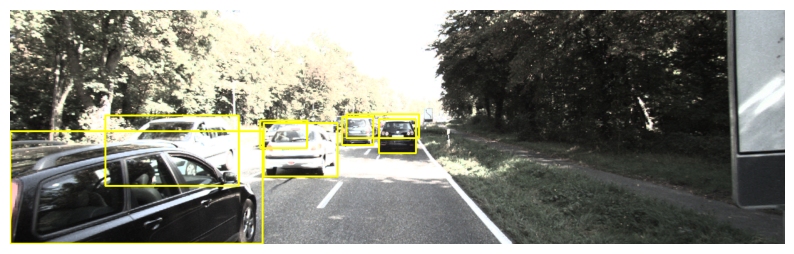

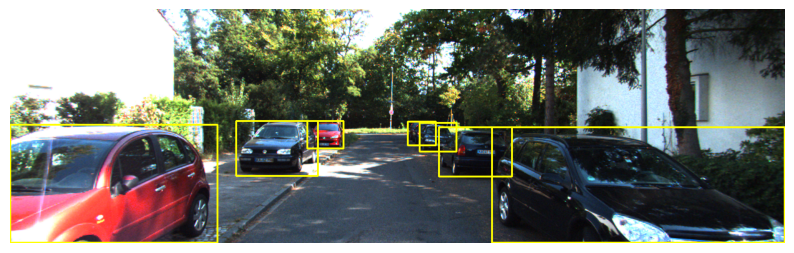

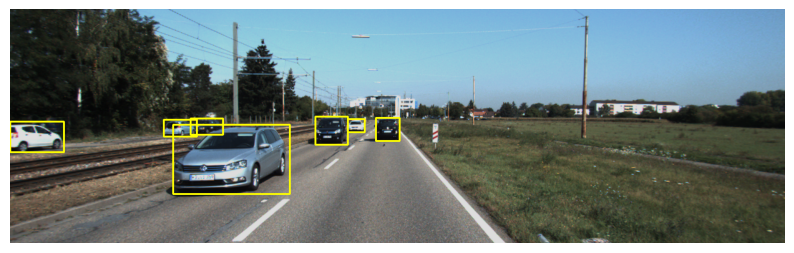

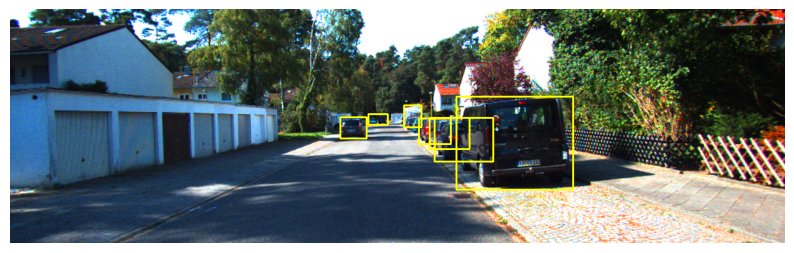

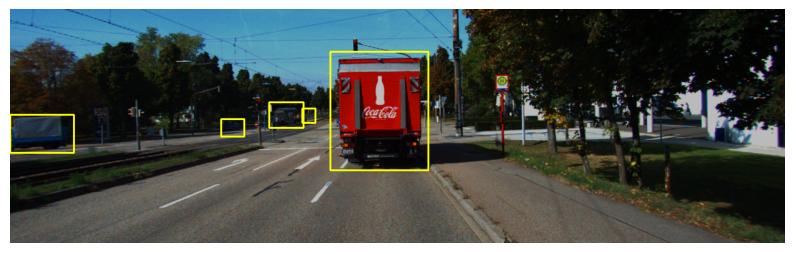

In [3]:
for i in range(5):
    img_path = selected_labels[i]['image_path']
    objCategoryid = selected_labels[i]['classid']
    boundingBox2D = selected_labels[i]['bbox'].copy()

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    modified_img = augment_hsv(im=image_rgb)
    draw_bbox_on_img_data(modified_img, boundingBox2D, figsize=(10,8))

## Histogram Equilization

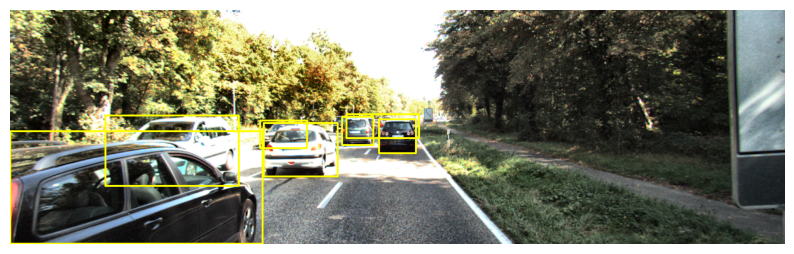

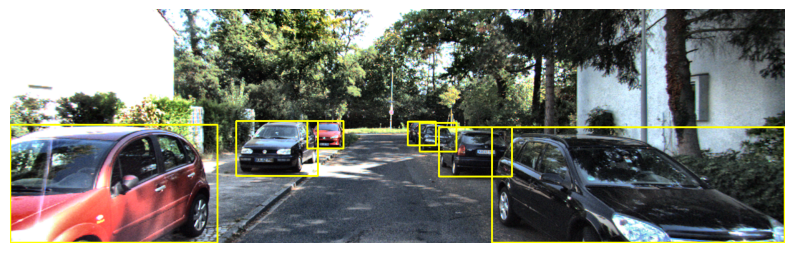

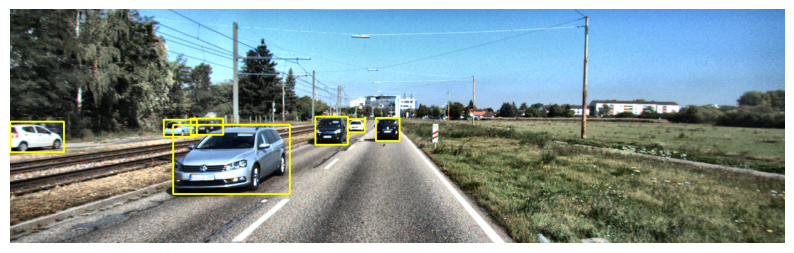

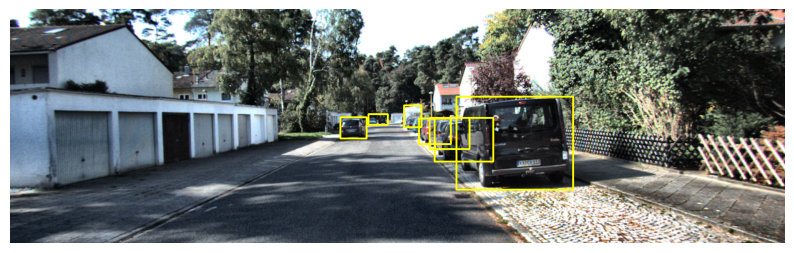

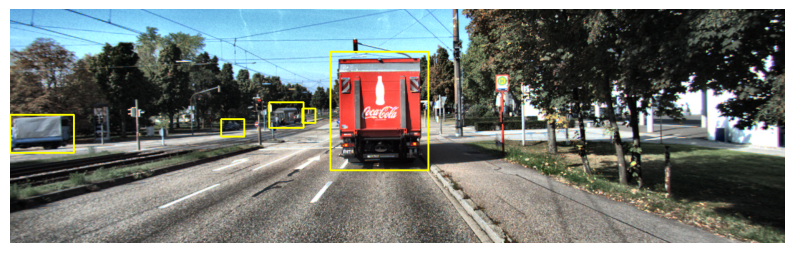

In [4]:
for i in range(5):
    img_path = selected_labels[i]['image_path']
    objCategoryid = selected_labels[i]['classid']
    boundingBox2D = selected_labels[i]['bbox'].copy()

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    modified_img = hist_equalize(im=image_rgb)
    draw_bbox_on_img_data(modified_img, boundingBox2D, figsize=(10,8))